### Linear Regression Model

- Input, Output, and Number of Samples
    - X: input variable (feature)
    - y: output variable (target)
    - N: Number of Samples
- Equation
    - Linear Equation to fit with data
    $$
    y = aX + b
    $$
- Measurement Metrics
    - MSE: Root Mean Square Error
    $$
    MSE = \frac{1}{N}{\sum}^N_{i=1}(y_i - \hat{y})^2
    $$
    $$
    RMSE = \sqrt{MSE} = \sqrt{\frac{1}{N}{\sum}^N_{i=1}(y_i - \hat{y})^2}
    $$
    - R Square Score
    $$
    R^2 = 1 - \frac{{\sum}^N_{i=1}(y_i - \hat{y})^2}{{\sum}^N_{i=1}(y_i - \bar{y})^2}
    $$
    - where $\hat{y}$ is predicted value of y
    - where $\bar{y}$ is mean value of y


In [48]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# load diabetes dataset

diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [50]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [51]:
# convert a Scikit-learn dataset to a Pandas dataset

diabetes_df = pd.DataFrame(data = np.c_[diabetes['data'], diabetes['target']], columns = diabetes['feature_names'] + ['target']) # np.c_ is the numpy concatenate function
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [52]:
diabetes_df.shape

(442, 11)

In [53]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [54]:
# get a feature and a target

X = diabetes_df['bmi']
X.head()

0    0.061696
1   -0.051474
2    0.044451
3   -0.011595
4   -0.036385
Name: bmi, dtype: float64

In [55]:
X.shape

(442,)

In [56]:
type(X)

pandas.core.series.Series

In [57]:
y = diabetes_df.target
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [58]:
y.shape

(442,)

In [59]:
type(y)

pandas.core.series.Series

In [60]:
# reshape before training model

X = X.values.reshape(-1, 1)
X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [61]:
X.shape

(442, 1)

In [62]:
type(X)

numpy.ndarray

In [63]:
y = y.values.reshape(-1, 1)
y

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

In [64]:
y.shape

(442, 1)

In [65]:
type(y)

numpy.ndarray

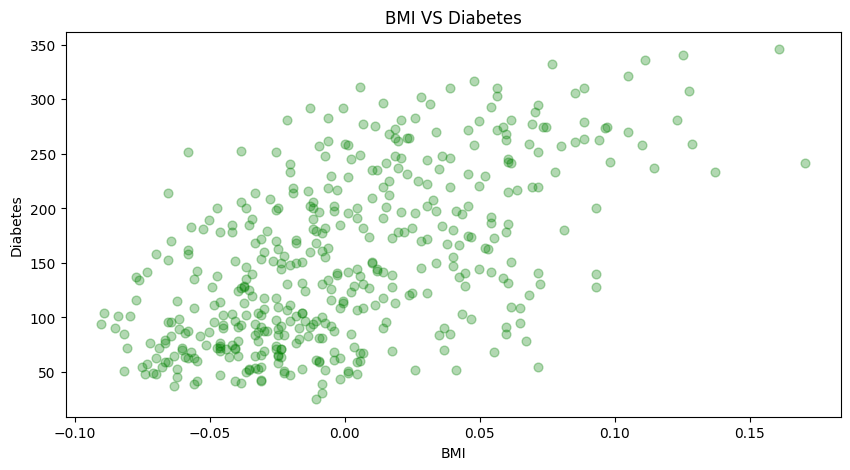

In [68]:
# plot 

plt.rcParams['figure.figsize'] = (10.0, 5.0)

plt.scatter(X, y, s= 40, color = 'green', marker = 'o', alpha = 0.3, label = 'Data')
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.title('BMI VS Diabetes')
plt.show()

In [69]:
# transform data

X = np.array(X).reshape(-1, 1)
X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [70]:
X.shape

(442, 1)

In [71]:
type(X)

numpy.ndarray

In [72]:
y = np.array(y).reshape(-1, 1)
y

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

In [73]:
y.shape

(442, 1)

In [76]:
type(y)

numpy.ndarray

In [78]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) # use default % train/test split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 1), (111, 1), (331, 1), (111, 1))

In [79]:
# create a linear regression model

lr = LinearRegression()
lr

LinearRegression()

In [80]:
# fit/train a model using training sets
lr.fit(X_train, y_train)

LinearRegression()

In [81]:
# predict y using X test

y_pred = lr.predict(X_test)
y_pred

array([[146.02400874],
       [188.07062105],
       [148.12633936],
       [202.78693536],
       [132.35885974],
       [128.15419851],
       [318.41511922],
       [196.47994352],
       [ 64.03311473],
       [167.0473149 ],
       [119.74487605],
       [ 95.56807397],
       [ 92.41457804],
       [165.99614959],
       [ 97.67040458],
       [157.58682713],
       [221.7079109 ],
       [238.52655583],
       [179.66129859],
       [209.09392721],
       [190.17295167],
       [110.28438828],
       [103.97739643],
       [174.40547205],
       [195.42877821],
       [165.99614959],
       [210.14509252],
       [134.46119036],
       [ 79.80059435],
       [131.30769443],
       [242.73121706],
       [115.54021482],
       [165.99614959],
       [146.02400874],
       [191.22411698],
       [228.01490275],
       [121.84720666],
       [119.74487605],
       [121.84720666],
       [ 95.56807397],
       [ 84.00525558],
       [122.89837197],
       [130.25652913],
       [119

In [82]:
# measure model performance using metrics

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error (RMSE) = ', round(rmse, 3))

Root Mean Square Error (RMSE) =  61.446


In [83]:
r2 = r2_score(y_test, y_pred)
print(f'R Square Score (R2) = ', round(r2, 3))

R Square Score (R2) =  0.317
